# Q6

In [288]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import numpy as np
import scipy.stats as st



## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [289]:
im = cv2.imread('images/taj.jpg' , 0)

In [290]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  padding = filter_size //2 
  image = img.copy() 
  w, h = img.shape
  
  leftside_padding = np.fliplr(img[ :  ,h-padding -1  :h -1])

  rightside_padding = np.fliplr(image[: , 1:padding+1])
  upside_padding = np.flipud(image[1:padding+1 , :])
  downside_padding =np.flipud( image[w-padding-1:w-1, : ])
  new_image = np.zeros((w+(2*padding) , h+(2*padding))); 
  
  w,h = new_image.shape
  new_image[padding:w-padding , padding : h-padding] = image
  new_image[padding:w-padding ,h-padding:h ] = leftside_padding
  new_image[padding:w-padding ,0:padding ] = rightside_padding
  new_image[0:padding,  padding:h-padding ] = upside_padding
  new_image[w-padding:w, padding : h-padding ] = downside_padding
  new_image[w-padding:w , 0:padding] = np.flipud(np.fliplr(image[image.shape[0] - padding -1:image.shape[0]-1 ,1:padding+1]))
  new_image[0:padding , 0:padding] = np.flipud(np.fliplr(image[1:padding+1 ,1:padding+1]))
  new_image[0:padding ,h-padding:h] = np.flipud(np.fliplr(image[1:padding+1 ,image.shape[1] - padding -1:image.shape[1]-1]))
  new_image[w-padding:w ,h-padding:h] = np.flipud(np.fliplr(image[image.shape[0] - padding -1:image.shape[0]-1 ,image.shape[1] - padding -1:image.shape[1]-1]))
  
  return new_image

(-0.5, 303.5, 303.5, -0.5)

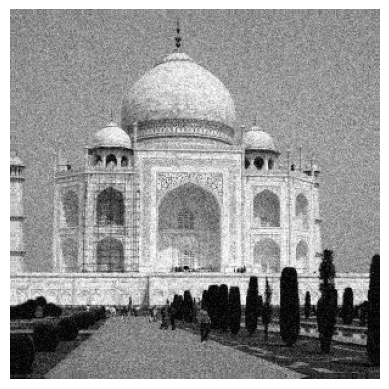

In [291]:


im = Reflect101(im , 5)
plt.imshow(im , cmap = 'gray')
plt.axis('off')

In [292]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  kernel = np.ones((filter_size , filter_size)) *1/filter_size
  s, t = kernel.shape
  w, h = image.shape
   
  new_image = np.zeros(( w - s + 1, h - t + 1))
  for i in range( w - s + 1):
      for j in range(h-t+1):
        new_image[i][j] = np.sum(image[i:i+s, j:j+t]*kernel)
  
  #######################
  #    your code here   #
  #######################
  padding = filter_size //2
  return new_image[padding:w , padding:h]

In [293]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  temp = []
  s = filter_size
  t = s
  w, h = image.shape
  
  new_image = np.zeros(( w - s + 1, h - t + 1))
  for i in range( w - s + 1):
      for j in range(h-t+1):
        temp = image[i:i+s, j:j+t].flatten()
        temp.sort()

        new_image[i][j] = temp[len(temp)//2]

  
  #######################
  #    your code here   #
  #######################
  
  return new_image





In [294]:


def gkern (kernel_size, sigma=1, muu=0):
 
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),np.linspace(-1, 1, kernel_size))
    dst = np.sqrt(x**2+y**2)
 
    normalize = 1/(2 * np.pi * sigma**2)

    return np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normalize
 
 #https://www.geeksforgeeks.org/how-to-generate-2-d-gaussian-array-using-numpy/amp/


def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    
    kernel = gkern(filter_size , sigma = 40)  
    g_kernel = 1/np.sum(kernel) * kernel
  
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = g_kernel)
    return result

In [295]:
# Do not change this cell
image = cv2.imread('images/taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

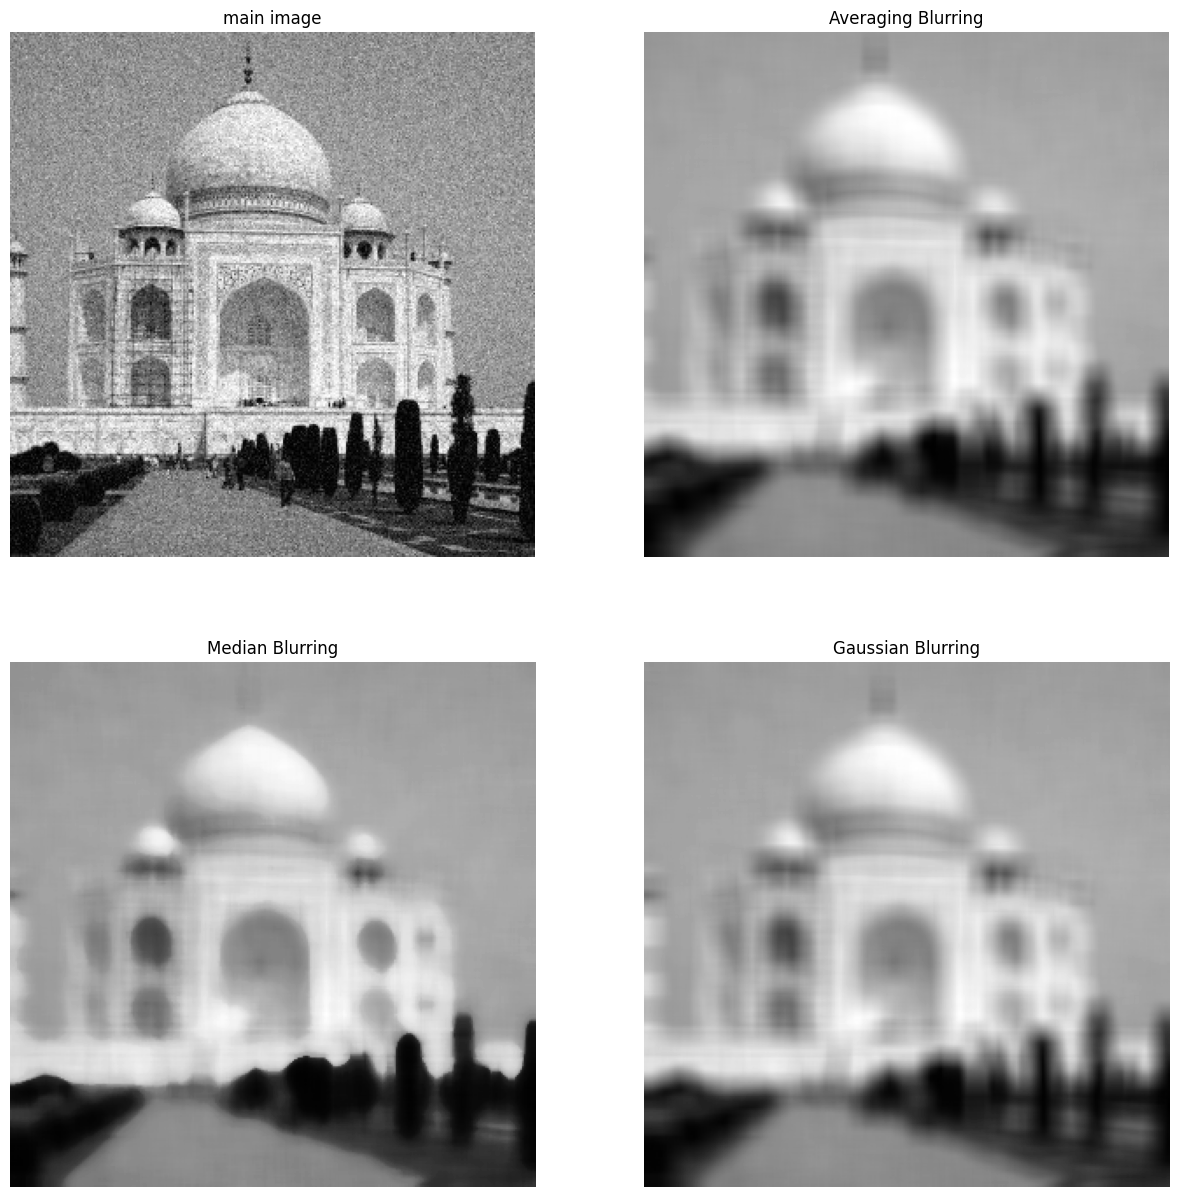

In [296]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [307]:
def distance(x, y, t, z):
    return ((x-t)**2 + (y-z)**2)**0.5

In [305]:

def gaussian(x, s):
    return (1/ (2 * math.pi * (s ** 2))) * math.exp(- (x ** 2) / (2 * (s ** 2)))

In [304]:


def Bilateral_Filtering(img, filter_size, std, rstd):
    pad_image = Reflect101(img, filter_size)
    s ,t = filter_size , filter_size
    w, h = pad_image.shape
    final_res = np.zeros( (w - s + 1, h - t + 1))
 
    for i in range(w-s +1):
        for j in range(h-s+1):
            image_part = pad_image[i:i+s , j:j+t]
            Wp = 0
            i_f = 0
            for u in range(filter_size): 
                for v in range(filter_size):
                    p  =  (u , v)
                    sx =  (i, j)
                    g_i = gaussian((image_part[u,v] - pad_image[i,j] ), std)
                    g_s = gaussian(distance(i ,j , u//2  + i , v//2 + j), rstd)
                    ws = g_i * g_s
                    Wp += ws
                    i_f += image_part[u,v] * ws
                    
            i_f = i_f / Wp
            final_res[i][j] = int(round(i_f))

    return final_res
    

Text(0.5, 1.0, 'bileteral filter')

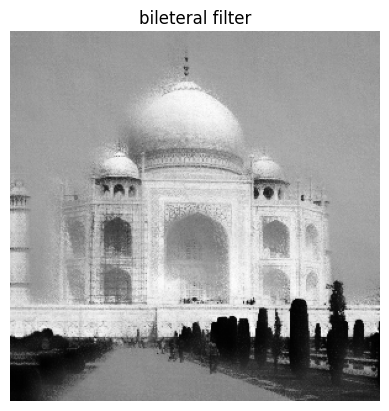

In [300]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
# cv2_imshow(bilateral)
plt.imshow(bilateral, cmap = 'gray')
plt.axis('off')
plt.title('bileteral filter')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
AveragingBlurring =  cv2.blur(image,(15,15))
MedianBlurring =   cv2.medianBlur(image,15)
GaussianBlurring =cv2.GaussianBlur(image,(15,15),40)

Bilateral =  cv2.bilateralFilter(image, 15, 40, 40)

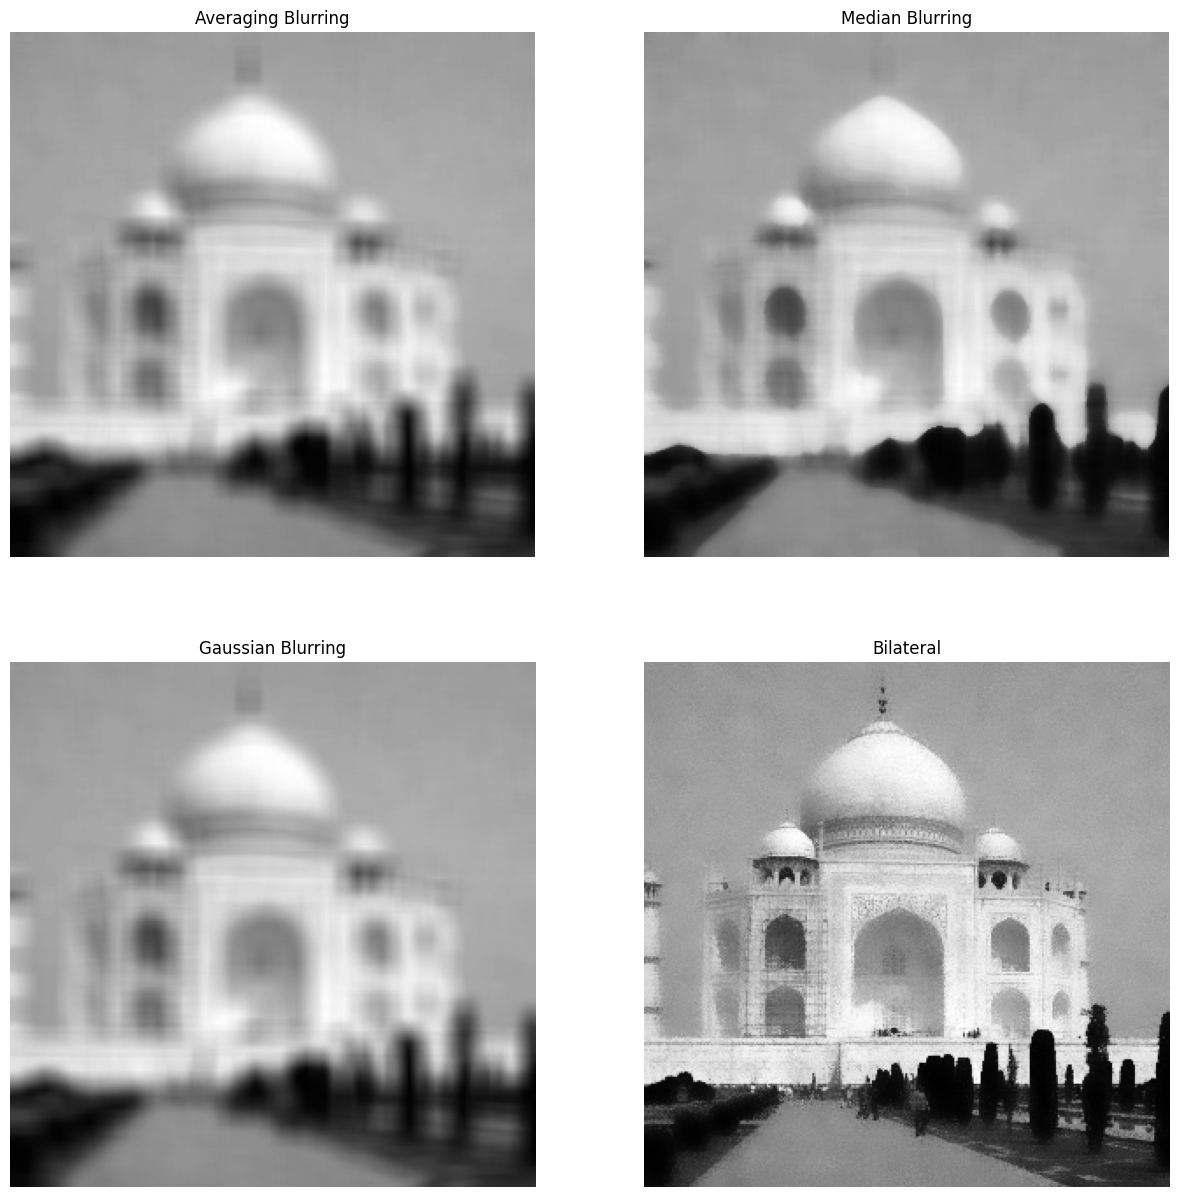

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")